In [30]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [31]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Data/train'
valid_path = 'Data/test'

In [32]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [33]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [34]:
  # useful for getting number of output classes
folders = glob('Data/train/*')

In [35]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [36]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [37]:

# view the structure of the model
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 111, 111, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

In [38]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [39]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [40]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [41]:
test_set = test_datagen.flow_from_directory('Data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [42]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20


2022-04-11 17:14:02.449996: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


61/61 [==============================] - ETA: 0s - loss: 2.4725 - accuracy: 0.7258

2022-04-11 17:14:20.925921: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


61/61 [==============================] - 22s 331ms/step - loss: 2.4725 - accuracy: 0.7258 - val_loss: 0.3333 - val_accuracy: 0.8333
Epoch 2/20
61/61 [==============================] - 18s 297ms/step - loss: 0.6446 - accuracy: 0.8883 - val_loss: 0.4593 - val_accuracy: 0.8333
Epoch 3/20
61/61 [==============================] - 20s 329ms/step - loss: 0.5737 - accuracy: 0.9042 - val_loss: 0.0446 - val_accuracy: 1.0000
Epoch 4/20
61/61 [==============================] - 19s 315ms/step - loss: 0.5403 - accuracy: 0.9200 - val_loss: 1.1033 - val_accuracy: 0.8333
Epoch 5/20
61/61 [==============================] - 21s 348ms/step - loss: 0.5132 - accuracy: 0.9262 - val_loss: 0.0354 - val_accuracy: 1.0000
Epoch 6/20
61/61 [==============================] - 20s 326ms/step - loss: 0.4649 - accuracy: 0.9308 - val_loss: 1.1568e-06 - val_accuracy: 1.0000
Epoch 7/20
61/61 [==============================] - 18s 293ms/step - loss: 0.5897 - accuracy: 0.9221 - val_loss: 0.0166 - val_accuracy: 1.0000
Epoch 

In [43]:
import matplotlib.pyplot as plt

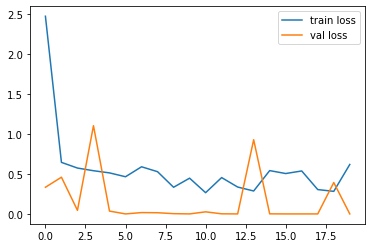

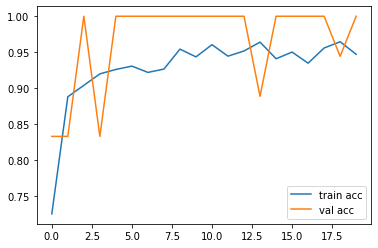

<Figure size 432x288 with 0 Axes>

In [44]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [45]:

from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [46]:
y_pred = model.predict(test_set)

2022-04-11 17:21:03.604481: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [47]:
y_pred

array([[4.21846181e-07, 7.62729346e-09, 1.38326969e-12, 9.99999523e-01],
       [1.00000000e+00, 0.00000000e+00, 3.89964583e-36, 7.18547508e-34],
       [4.69171800e-34, 1.52003571e-32, 8.21960043e-30, 1.00000000e+00],
       [1.00000000e+00, 1.16152844e-30, 3.16144771e-28, 0.00000000e+00],
       [3.54009382e-27, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.14974483e-20, 1.00000000e+00, 3.12816090e-22, 6.88082955e-18],
       [3.06507736e-11, 1.61649343e-08, 2.47405947e-19, 1.00000000e+00],
       [5.23974419e-09, 5.86068791e-13, 1.00000000e+00, 4.00460476e-35],
       [1.00981164e-36, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.17029662e-15, 4.21313491e-31, 1.77862527e-26],
       [5.16650456e-32, 1.00000000e+00, 3.70496020e-33, 2.12114625e-22],
       [0.00000000e+00, 2.25753186e-13, 1.97472237e-34, 1.00000000e+00],
       [1.26554678e-05, 2.37973035e-29, 9.99987364e-01, 3.17231019e-28],
       [1.27337071e-10, 1.34466343e-15, 1.00000000e

In [48]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [49]:
y_pred

array([3, 0, 3, 0, 2, 1, 3, 2, 1, 0, 1, 3, 2, 2, 3, 1, 1, 2])

In [50]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [52]:
model=load_model('model_inception.h5')